In [57]:
"""
Landon Buell
30 December 2019
"""

import numpy as np
import matplotlib.pyplot as plt
import os

import scipy.fftpack as fftpack
import scipy.signal as signal
import scipy.io.wavfile as sciowav

int_dir = 'C:/Users/Landon/Documents/GitHub/Buell-Senior-Thesis/Notebooks'
wav_dir = 'C:/Users/Landon/Documents/wav_audio'

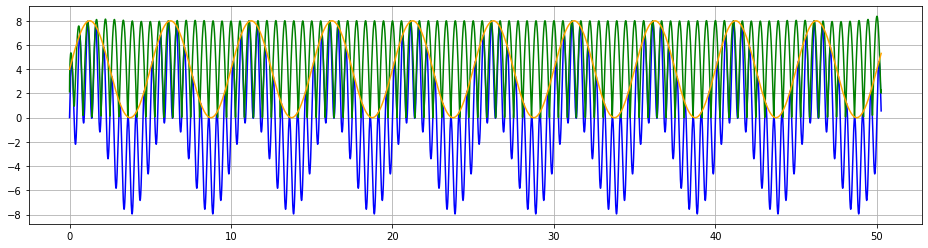

In [58]:
dt = 0.001
t = np.arange(0,16*np.pi,dt)
y1 = 4*np.sin(2*np.pi*2*t) + 4*np.sin(2*np.pi*0.2*t)
y2 = np.abs(signal.hilbert(x=y1,N=len(t)))
y3 = 4*np.sin(2*np.pi*0.2*t)+4

plt.figure(figsize=(16,4))
plt.plot(t,y1,color='blue')
plt.plot(t,y2,color='green')
plt.plot(t,y3,color='orange')

plt.grid()
plt.show()

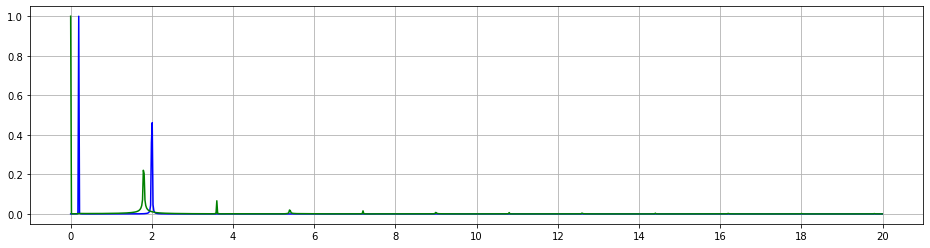

In [60]:
fspace = fftpack.fftfreq(n=len(t),d=dt)

y1_fft = fftpack.fft(x=y1,n=len(t))
y1_pwr = np.abs(y1_fft)**2
y2_fft = fftpack.fft(x=y2,n=len(t))
y2_pwr = np.abs(y2_fft)

pts = np.where((fspace>=0)&(fspace<=20))
fspace = fspace[pts]
y1_pwr = y1_pwr[pts]/np.max(y1_pwr)
y2_pwr = y2_pwr[pts]/np.max(y2_pwr)

plt.figure(figsize=(16,4))
plt.plot(fspace,y1_pwr,color='blue')
plt.plot(fspace,y2_pwr,color='green')
plt.xticks(np.arange(0,21,2))
plt.grid()
plt.show()

Points in wav file: 201522
Time of wav file: 4.569659863945578


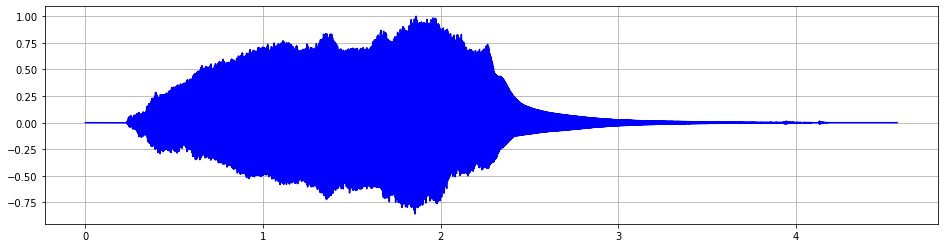

In [68]:
        #### LOAD .WAV FILE ####

filename = 'Viola.arco.sulG.G4.L.wav'
os.chdir(wav_dir)
rate,x1 = sciowav.read(filename)
os.chdir(int_dir)
x1 = x1/np.max(x1)
time = np.arange(0,len(x1),1)/44100
print("Points in wav file:",len(x1))
print("Time of wav file:",len(x1)/44100)

plt.figure(figsize=(16,4))
plt.plot(time,x1,color='blue')
plt.grid()
plt.show()

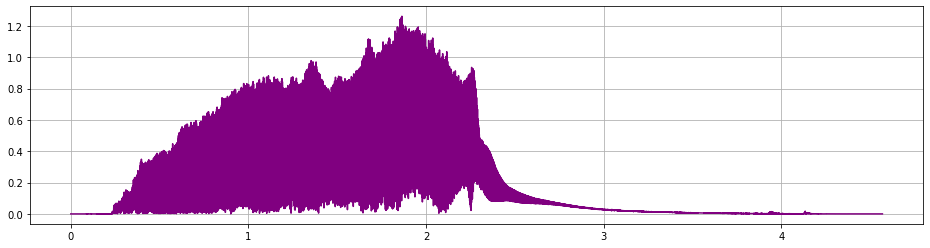

In [71]:
x2 = np.abs(signal.hilbert(x=x1,N=len(time)))

plt.figure(figsize=(16,4))
plt.plot(time,x2,color='purple')
plt.grid()
plt.show()